In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv("CTG_Stock_Data.csv")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [19]:
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size 
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# 4. Quá trình testing \n",
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [22]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo\n",
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27887.78044666 27895.72256305 27903.66467945 27911.60679584
 27919.54891223 27927.49102862 27935.43314501 27943.3752614
 27951.31737779 27959.25949418 27967.20161057 27975.14372696
 27983.08584335 27991.02795974 27998.97007614 28006.91219253
 28014.85430892 28022.79642531 28030.7385417  28038.68065809
 28046.62277448 28054.56489087 28062.50700726 28070.44912365
 28078.39124004 28086.33335643 28094.27547283 28102.21758922
 28110.15970561 28118.101822  ]


In [23]:
# 6. Đánh giá độ chính xác test
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
#MSLE
test_msle = np.mean((np.log1p(y_test) - np.log1p(y_pred))**2)
print('Testing MSLE:', test_msle)
# Mean Absolute Percentage Error (MAPE)
test_mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
print('Testing MAPE:', test_mape)

Testing RMSE: 3048.771185967906
Testing MSLE: 0.014145534869475325
Testing MAPE: 8.447286105220346


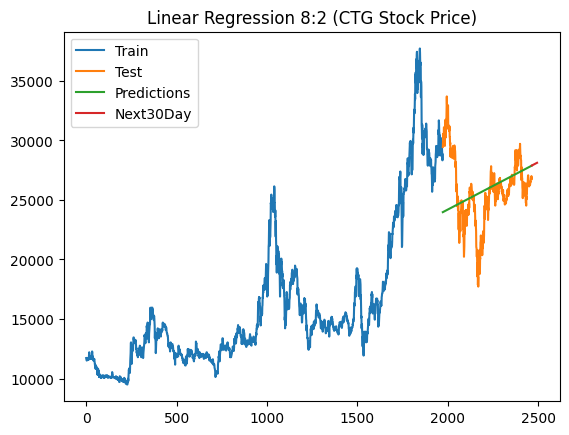

In [24]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 8:2 (CTG Stock Price)')
plt.show()